In [1]:
%load_ext autoreload
%autoreload 2

In [37]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pyshtools as pysh
import SLmod as SL
from numpy import pi as pi

#set plotting parameters
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [16, 8]


# set expansion degree
L=256

# load the initial ice and sea level data
sl0,ice0 = SL.get_sl_ice_data(L)

# compute the ocean function
C = SL.ocean_function(sl0,ice0)

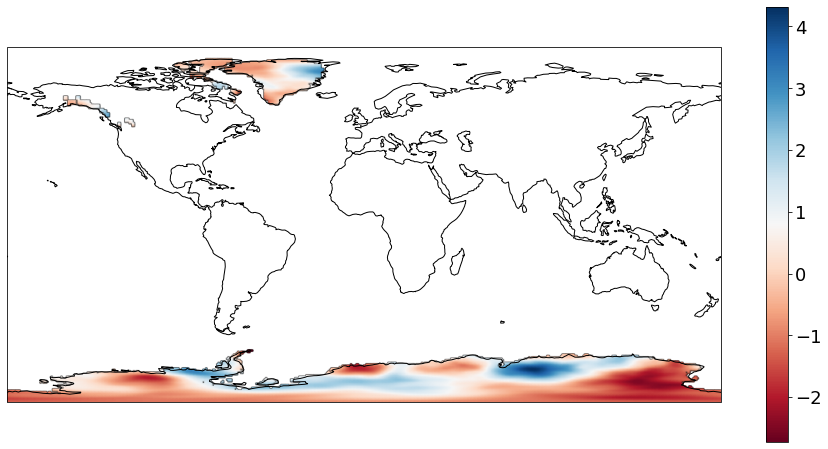

iteration =  1 relative change =  0.019615054022911325
iteration =  2 relative change =  0.0022920468731016663
iteration =  3 relative change =  0.0004104707156291864
iteration =  4 relative change =  8.7338170974453e-05
iteration =  5 relative change =  2.0218256809340522e-05
iteration =  6 relative change =  4.9565291001890146e-06
iteration =  7 relative change =  1.2750190249337586e-06
iteration =  8 relative change =  3.478000699490382e-07


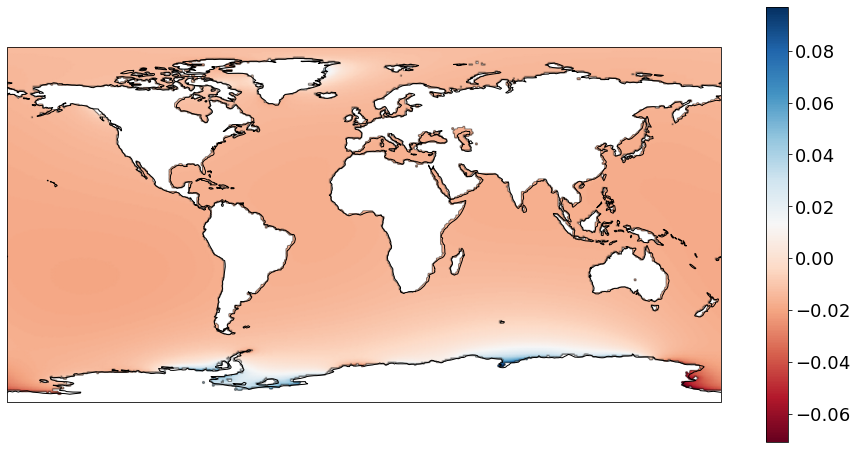

iteration =  1 relative change =  0.23670608317971592
iteration =  2 relative change =  0.05668239828835387
iteration =  3 relative change =  0.013975019194731514
iteration =  4 relative change =  0.0035786713053865154
iteration =  5 relative change =  0.0009546155628698385
iteration =  6 relative change =  0.00026494509699818953
iteration =  7 relative change =  7.619083992175004e-05
iteration =  8 relative change =  2.2571103978119217e-05
iteration =  9 relative change =  6.846345577569303e-06
iteration =  10 relative change =  2.1140634813890628e-06
iteration =  11 relative change =  6.614202171867869e-07


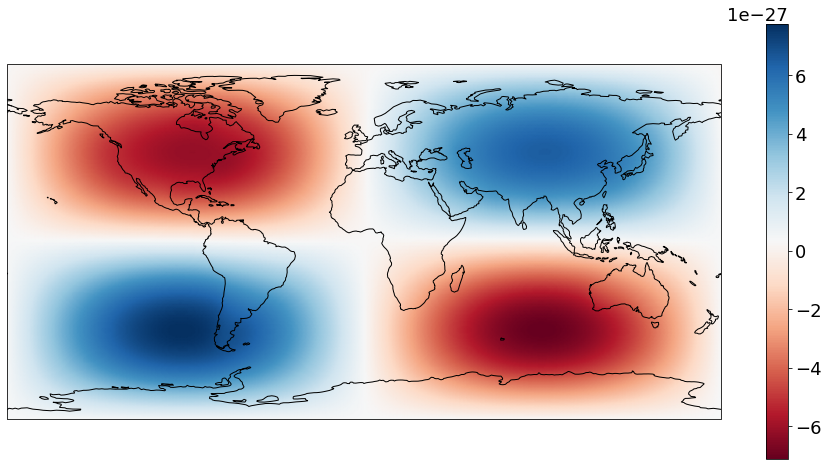

-1.2181833749370565e-11 -1.218268639996559e-11 0.9999300112826488
-1.2181833749370565e-11


In [48]:
# set covariance for a random field
Q = SL.laplace_covariance(L,std = 1.,s = 3,mu = 0.05) 

# build a random melt geometry
ice = SL.random_field(Q)*SL.ice_mask(C,ice0,0.)
                          
# plot the result with suitable mask
ice_mask = SL.ice_mask(C,ice0)
SL.geo_plot(ice_mask*ice)

# solve the fingerprint problem
zeta  = SL.rhoi*(1-C)*ice
zeta_u = pysh.SHGrid.from_zeros(lmax=L,grid='GLQ',kind=SL.kind)
zeta_phi = pysh.SHGrid.from_zeros(lmax=L,grid='GLQ',kind=SL.kind)
lv = np.zeros(2)
sl,u,phi,om,psi = SL.generalised_fingerprint(C,zeta,zeta_u,zeta_phi,lv)
ocean_mask = SL.ocean_mask(C)
SL.geo_plot(ocean_mask*sl)

# set the observation point and set the adjoint loads
lats = np.zeros(1)
lons = np.zeros(1)
lats[0] =  52.48
lons[0] =  1.75
zeta_d        = 0*SL.point_load(L,lats,lons,angle = 2)
zeta_u_d      = 0*SL.point_load(L,lats,lons,angle = 2) 
zeta_phi_d    = 0*SL.point_load(L,lats,lons,angle = 5) 
lv_d  = np.zeros(2)
lv_d[1] = -SL.g

# act the adjoint load on the sea level to get the observation
J =   SL.surface_integral(zeta_d*sl) - SL.surface_integral(zeta_u_d*u) \
       - SL.surface_integral(zeta_phi_d*(phi+psi))/SL.g - np.inner(lv_d,om)/SL.g

# solve the adjoint problem
sl_d,_,_,_,_ = SL.generalised_fingerprint(C,zeta_d,zeta_u_d,zeta_phi_d,lv_d)
#SL.geo_plot(SL.ice_mask(C,ice0)*sl_d)
SL.geo_plot(sl_d)

# act the load on the adjoint sea level
J2 =   SL.surface_integral(zeta*sl_d)          

print(J,J2,J/J2)
print(om[1])


In [33]:
1/SL.Om

13750.987083139758